# TAXI PREDICTION PRICE

In [55]:
# Library For DataFrame
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import scipy
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from IPython import get_ipython
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
from sklearn.preprocessing import OneHotEncoder






## Import Dataset

In [56]:
df = pd.read_csv("D:\\PreWork Preparation\\My Project\\DS Uber VS Lyft\\rideshare_kaggle.csv")
pd.set_option("display.max.columns", None)
df.sample(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
160662,461014e8-c8e1-4c10-892f-899554da4cef,1.543779e+09,19,2,12,2018-12-02 19:37:57,America/New_York,South Station,Beacon Hill,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,14.0,2.50,1.0,42.3503,-71.0810,49.88,49.22,Light Rain,Light rain until evening.,0.0246,1.0,0.93,3.38,3.38,1543755600,3.052,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,rain,48.02,1004.33,159,1.00,0,3.052,282.5,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
392734,2844f5f0-f227-43f3-982a-d545b0c0a9ae,1.543432e+09,19,28,11,2018-11-28 19:14:07,America/New_York,North Station,South Station,Lyft,lyft_premier,Lux,16.5,2.06,1.0,42.3503,-71.0810,41.47,35.66,Overcast,Mostly cloudy throughout the day.,0.0000,0.0,0.63,9.54,14.86,1543431600,10.000,42.72,1543438800,37.59,1543485600,36.75,1543438800,32.25,1543478400,cloudy,29.72,991.85,295,1.00,0,10.000,354.2,1543405940,1543439725,0.72,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800
599631,d9f9916e-cfd1-472e-9650-13a84d492590,1.544953e+09,9,16,12,2018-12-16 09:40:09,America/New_York,Northeastern University,Theatre District,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,15.0,1.24,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
9140,171d658d-4b7b-490e-b652-dd74cfd2a350,1.543742e+09,9,2,12,2018-12-02 09:08:05,America/New_York,Northeastern University,Theatre District,Lyft,lyft_plus,Lyft XL,13.5,2.01,1.0,42.3661,-71.0631,38.54,36.11,Light Rain,Light rain until evening.,0.0308,1.0,0.93,3.53,3.98,1543755600,4.421,50.94,1543788000,44.88,1543816800,50.27,1543788000,45.53,1543816800,rain,36.81,1019.41,124,1.00,0,4.421,271.2,1543751796,1543785235,0.86,0.0894,1543770000,36.40,1543726800,50.94,1543788000,35.78,1543748400,50.27,1543788000
85563,4983665f-5e33-4adc-8561-80aa59ad2bbe,1.544969e+09,14,16,12,2018-12-16 14:00:11,America/New_York,North End,Beacon Hill,Lyft,lyft_line,Shared,7.0,1.78,1.0,42.3661,-71.0631,42.21,37.73,Overcast,Rain throughout the day.,0.0000,0.0,0.71,7.12,9.48,1545015600,9.810,43.78,1544990400,34.12,1545044400,38.39,1544986800,28.21,1545044400,cloudy,33.41,1021.86,86,1.00,1,9.810,322.0,1544962122,1544994841,0.30,0.1246,1544979600,38.94,1544954400,43.78,1544990400,33.76,1545019200,38.39,1544986800
385807,0f87c7fa-2a9e-4721-8649-c64593b60892,1.543864e+09,19,3,12,2018-12-03 19:02:57,America/New_York,South Station,Theatre District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,14.5,1.30,1.0,42.3398,-71.0892,53.34,53.34,Overcast,Foggy in the morning.,0.0000,0.0,0.50,7.32,8.99,1543856400,10.000,57.52,1543852800,33.58,1543921200,56.85,1543852800,28.06,1543914000,cloudy,35.04,999.71,289,0.89,0,10.000,313.1,1543838259,1543871631,0.89,0.0004,1543852800,42.83,1543896000,57.52,1543852800,39.65,1543896000,56.85,1543852800
140845,e8a7a52a-5af1-480e-beb3-83e34bf0336a,1.543425e+09,17,28,11,2018-11-28 17:08:07,America/New_York,Fenway,West End,Uber,997ac

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Explore Data Anlysis

In [58]:
#Change date into datetime format
df['datetime']=pd.to_datetime(df['datetime'])

In [59]:
print('Dimensi dari Cab Prices :', df.shape)

Dimensi dari Cab Prices : (693071, 57)


In [60]:
df.isnull().sum().sum()

55095

In [61]:
df_clear = df.dropna(axis=0)
df_clear.isnull().sum().sum()

0

In [62]:
df_clear.duplicated().sum()

0

It seems like there is 2 column 'Visibilty' so we better drop one of them.

In [63]:
df_clear.drop(['visibility.1'],axis=1, inplace=True)

In [64]:
df_clear.sample(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
240669,fd3aa151-ee70-4dc5-8f82-02e178bd6622,1.544720e+09,16,13,12,2018-12-13 16:50:11,America/New_York,North Station,Boston University,Lyft,lyft_lux,Lux Black,27.5,3.15,1.0,42.3588,-71.0707,30.46,30.46,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.56,2.48,3.25,1544738400,9.908,33.62,1544731200,27.07,1544788800,32.68,1544734800,27.72,1544788800,partly-cloudy-day,16.62,1033.94,16,0.75,1,326.0,1544702794,1544735604,0.21,0.0001,1544716800,18.31,1544688000,33.62,1544731200,13.97,1544688000,32.68,1544734800
388623,e28bb549-c302-499c-ac01-e74cc175d2e9,1.545007e+09,0,17,12,2018-12-17 00:35:10,America/New_York,North End,North Station,Lyft,lyft_line,Shared,5.0,1.02,1.0,42.3503,-71.0810,40.93,35.58,Rain,Rain throughout the day.,0.1044,0.99,0.90,8.29,9.96,1545015600,2.825,43.73,1544990400,34.24,1545044400,38.39,1544986800,28.43,1545044400,rain,38.12,1012.14,54,0.99,0,325.3,1544962123,1544994849,0.30,0.1254,1544979600,38.94,1544954400,43.73,1544990400,33.99,1545019200,38.39,1544986800
65384,db4b25b6-8550-43bb-a38b-adc78ed110aa,1.545019e+09,3,17,12,2018-12-17 03:50:09,America/New_York,North End,Beacon Hill,Lyft,lyft_lux,Lux Black,19.5,1.83,1.0,42.3503,-71.0810,40.45,34.66,Light Rain,Rain throughout the day.,0.0591,1.00,0.91,8.96,15.70,1545015600,2.994,43.73,1544990400,34.24,1545044400,38.39,1544986800,28.43,1545044400,rain,37.95,1009.25,47,1.00,0,324.4,1544962123,1544994849,0.30,0.1254,1544979600,38.94,1544954400,43.73,1544990400,33.99,1545019200,38.39,1544986800
191353,4e7c9151-7576-4657-a28a-35fc55bd0bfe,1.543764e+09,15,2,12,2018-12-02 15:28:02,America/New_York,North End,Theatre District,Lyft,lyft_line,Shared,7.0,1.50,1.0,42.3519,-71.0643,45.40,41.79,Light Rain,Light rain until evening.,0.0701,1.00,0.92,6.71,8.63,1543755600,3.028,51.12,1543788000,44.96,1543816800,50.45,1543788000,45.61,1543816800,rain,43.19,1013.15,115,1.00,1,277.5,1543751794,1543785238,0.86,0.0903,1543770000,36.29,1543726800,51.12,1543788000,35.71,1543748400,50.45,1543788000
617153,f2c801a6-9997-4167-b3ff-38f12f67f504,1.544749e+09,1,14,12,2018-12-14 01:00:11,America/New_York,Back Bay,Fenway,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,18.0,1.34,1.0,42.3398,-71.0892,30.64,30.64,Overcast,Partly cloudy throughout the day.,0.0000,0.00,0.65,2.40,3.33,1544738400,10.000,33.88,1544731200,26.76,1544788800,32.93,1544734800,27.41,1544788800,cloudy,20.26,1035.14,168,0.93,0,324.9,1544702795,1544735612,0.21,0.0001,1544716800,17.94,1544688000,33.88,1544731200,13.71,1544688000,32.93,1544734800


In [65]:
df_clear.nunique().sort_values()

timezone                            1
month                               2
cab_type                            2
uvIndex                             3
surge_multiplier                    7
icon                                7
short_summary                       9
long_summary                       11
latitude                           11
name                               12
destination                        12
source                             12
product_id                         12
longitude                          12
day                                17
moonPhase                          18
uvIndexTime                        20
temperatureHighTime                23
temperatureMaxTime                 23
hour                               24
temperatureMinTime                 25
windGustTime                       25
apparentTemperatureHighTime        27
apparentTemperatureMaxTime         27
precipProbability                  29
apparentTemperatureMinTime         29
temperatureL

In [66]:
#There is only 1 timezone so its not really important
df_clear.drop(['timezone'],axis=1, inplace=True)

There is a lot of data about temperature, so to check the correlation beetween the 'price' and 'temperature'. 

In [67]:
temp_cols= ['temperature','apparentTemperature',
'temperatureHigh','temperatureLow','apparentTemperatureHigh',
'apparentTemperatureLow','temperatureMin','temperatureHighTime',
'temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
'apparentTemperatureMaxTime','apparentTemperatureMinTime','temperatureMaxTime','temperatureMinTime',
'temperatureLowTime', 'apparentTemperatureLowTime','apparentTemperatureHighTime',
'price']

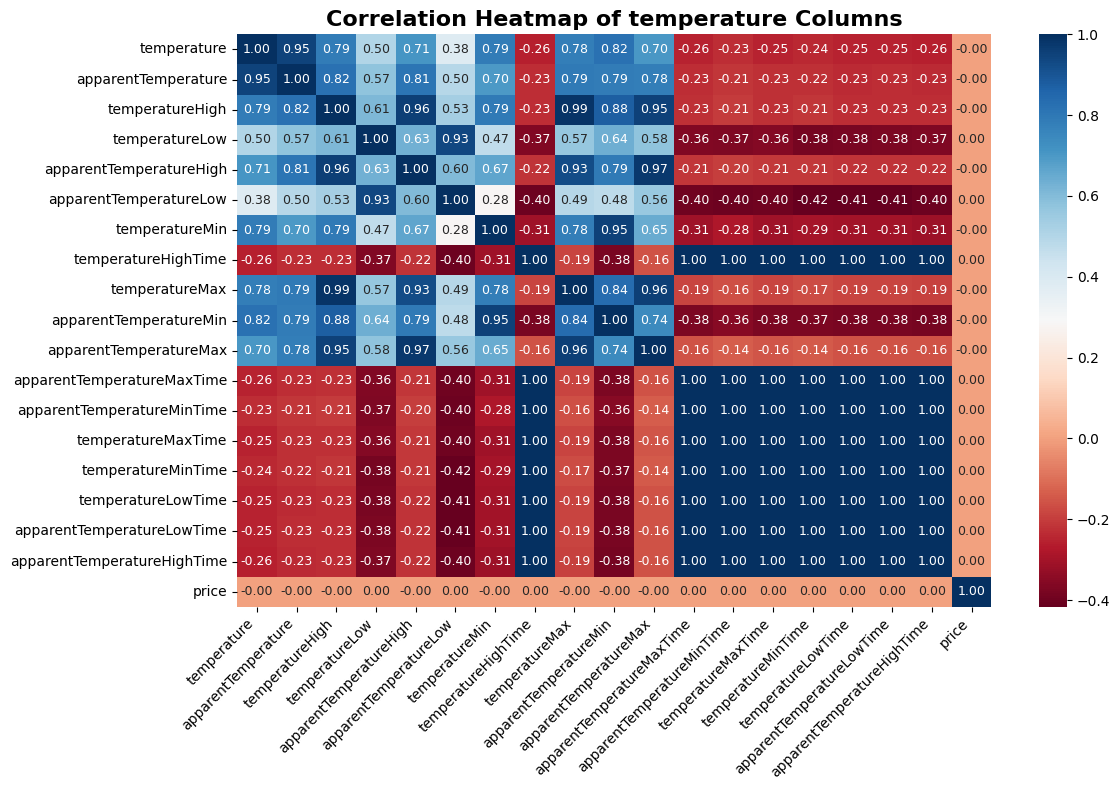

In [68]:
df_temperature = df_clear[temp_cols]
plt.figure(figsize=(12, 8))
heatmap_temperature = sns.heatmap(df_temperature.corr(), annot=True, fmt=".2f", cmap='RdBu', annot_kws={"fontsize": 9})
heatmap_temperature.set_title('Correlation Heatmap of temperature Columns', fontsize=16, fontweight='bold')
heatmap_temperature.set_xticklabels(heatmap_temperature.get_xticklabels(), rotation=45, ha='right', fontsize=10)
heatmap_temperature.set_yticklabels(heatmap_temperature.get_yticklabels(), rotation=0, ha='right', fontsize=10)
cbar_temperature = heatmap_temperature.collections[0].colorbar
cbar_temperature.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()



It seems there is only a little correlation from 'temperature' and 'price', better to be drop.

In [69]:
df_clear = df_clear.drop(['temperature','apparentTemperature',
'temperatureHigh','temperatureLow','apparentTemperatureHigh',
'apparentTemperatureLow','temperatureMin','temperatureHighTime',
'temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
'apparentTemperatureMaxTime','apparentTemperatureMinTime','temperatureMaxTime','temperatureMinTime',
'temperatureLowTime', 'apparentTemperatureLowTime','apparentTemperatureHighTime'], axis=1)
df_clear.sample(5)

,id,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime
662980,1c52e3f0-0347-4416-a58e-2a77df16b3fd,1.545089e+09,23,17,12,2018-12-17 23:25:10,Boston University,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,17.5,3.04,1.0,42.3559,-71.0550,Overcast,Light rain in the morning.,0.0,0.0,0.70,7.11,11.22,1545022800,9.955,cloudy,29.98,1000.88,294,0.92,0,376.8,1545048556,1545081259,0.33,0.0177,1545066000
462925,86ad2b03-3f48-4bba-9382-842db78e9641,1.543698e+09,21,1,12,2018-12-01 21:03:02,Northeastern University,Back Bay,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,1.62,1.0,42.2148,-71.0330,Mostly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.65,3.03,3.03,1543672800,9.454,partly-cloudy-night,29.53,1023.13,99,0.54,0,271.9,1543665299,1543698873,0.82,0.0000,1543683600
511095,17ebc23c-c8f7-477c-82e9-84ad476a4a89,1.544831e+09,23,14,12,2018-12-14 23:40:05,Haymarket Square,Theatre District,Lyft,lyft,Lyft,7.0,1.24,1.0,42.3505,-71.1054,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.79,3.73,3.73,1544846400,9.716,partly-cloudy-night,35.45,1028.05,179,0.82,0,290.8,1544789245,1544822025,0.24,0.0000,1544806800
551718,b7599254-abee-48a3-86e6-bc1457aa8742,1.543823e+09,7,3,12,2018-12-03 07:43:02,Financial District,South Station,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.5,0.39,1.0,42.2148,-71.0330,Overcast,Foggy in the morning.,0.0,0.0,0.95,1.44,1.44,1543860000,3.188,cloudy,45.86,1000.81,166,1.00,0,292.7,1543838223,1543871641,0.89,0.0007,1543852800
445689,6b66a747-842a-4d55-bd1d-83e21e01d1d1,1.545147e+09,15,18,12,2018-12-18 15:30:03,North Station,Boston University,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,34.0,3.01,1.0,42.3647,-71.0542,Partly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.46,14.11,24.43,1545127200,10.000,partly-cloudy-day,9.37,1010.13,318,0.43,1,376.9,1545134994,1545167678,0.37,0.0028,1545152400


There is some columns that doesnt seem important such as id, product_id, and timestamp. We better drop it.

In [70]:
df_clear = df_clear.drop(['id', 'product_id', 'timestamp'], axis=1)

Its seems like we can divide the columns into climate columns and find the correlation between it with the price.

In [71]:
climate_cols = ['precipIntensity', 'precipProbability', 'humidity', 
'windSpeed','windGust', 'visibility', 
'dewPoint', 'pressure', 'windBearing',
'cloudCover', 'uvIndex', 'ozone', 
'moonPhase','precipIntensityMax',
'uvIndexTime', 'sunsetTime', 'sunriseTime', 'windGustTime',
'price']

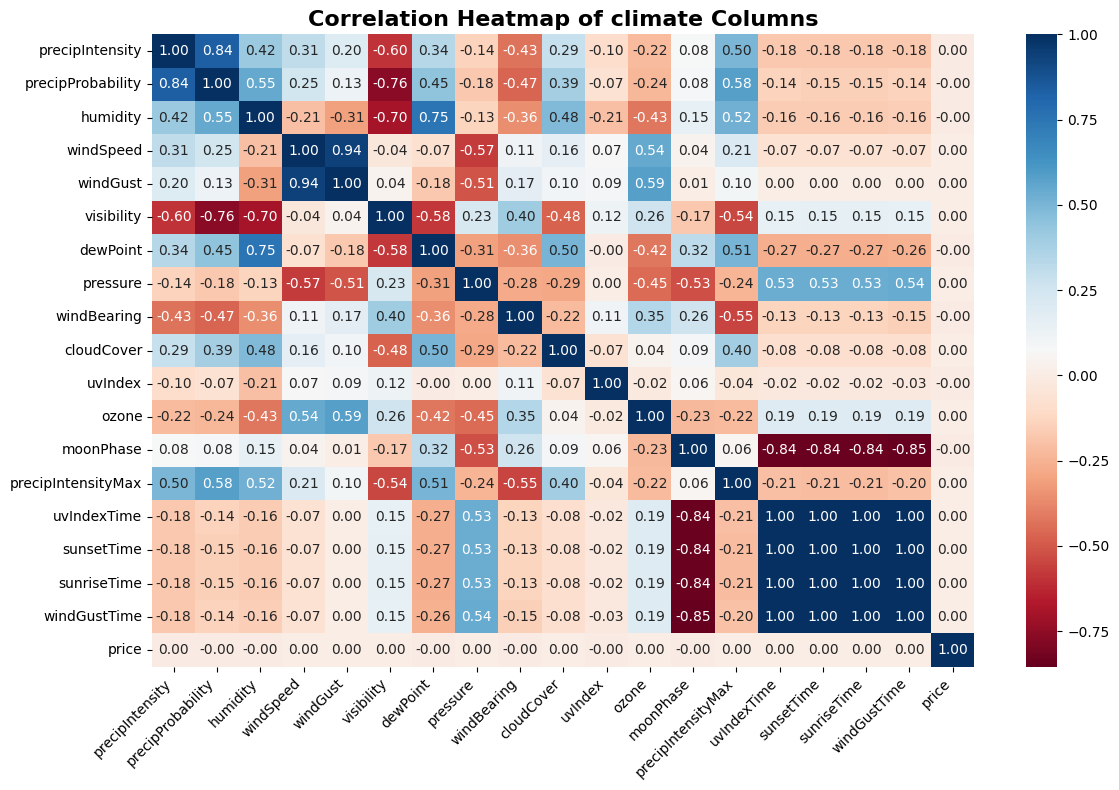

In [72]:
df_climate = df_clear[climate_cols]
plt.figure(figsize=(12, 8))
heatmap_climate = sns.heatmap(df_climate.corr(), annot=True, fmt=".2f", cmap='RdBu', annot_kws={"fontsize": 10})
heatmap_climate.set_title('Correlation Heatmap of climate Columns', fontsize=16, fontweight='bold')
heatmap_climate.set_xticklabels(heatmap_climate.get_xticklabels(), rotation=45, ha='right', fontsize=10)
heatmap_climate.set_yticklabels(heatmap_climate.get_yticklabels(), rotation=0, ha='right', fontsize=10)
cbar_climate = heatmap_climate.collections[0].colorbar
cbar_climate.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()



It seem also have a low correlation.

In [73]:
df_clear = df_clear.drop(['precipIntensity', 'precipProbability', 'humidity', 
'windSpeed','windGust', 'visibility', 
'dewPoint', 'pressure', 'windBearing',
'cloudCover', 'uvIndex', 'ozone', 
'moonPhase','precipIntensityMax',
'uvIndexTime', 'sunsetTime', 'sunriseTime', 'windGustTime'], axis=1)
df_clear.sample(5)

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary,long_summary,icon
122238,20,3,12,2018-12-03 20:33:04,Northeastern University,Beacon Hill,Uber,UberXL,16.0,2.61,1.0,42.3398,-71.0892,Mostly Cloudy,Foggy in the morning.,partly-cloudy-day
229618,16,1,12,2018-12-01 16:13:02,North End,Beacon Hill,Uber,Black,22.5,2.67,1.0,42.3647,-71.0542,Mostly Cloudy,Light rain in the morning and overnight.,partly-cloudy-day
556400,18,17,12,2018-12-17 18:20:13,Fenway,North Station,Lyft,Lux Black,26.0,3.23,1.0,42.2148,-71.0330,Overcast,Light rain in the morning and overnight.,cloudy
423036,1,17,12,2018-12-17 01:30:13,North End,Financial District,Lyft,Lux Black,16.5,1.18,1.0,42.3519,-71.0643,Rain,Rain throughout the day.,rain
1143,19,1,12,2018-12-01 19:18:03,Back Bay,North End,Uber,UberXL,21.5,3.19,1.0,42.3661,-71.0631,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-day


### Data Visualization

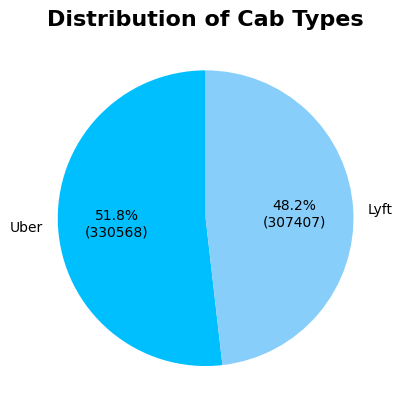

In [74]:

cab_type_counts = df_clear['cab_type'].value_counts()

labels = cab_type_counts.index
sizes = cab_type_counts.values

# Set custom colors for the pie chart (in this case, blue)
colors = ['deepskyblue', 'lightskyblue']

# Plot the pie chart with customizations
plt.pie(sizes, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sizes.sum())})", startangle=90, colors=colors)

# Add a title
plt.title('Distribution of Cab Types', fontsize=16, fontweight='bold')

# Display the chart
plt.show()

<Figure size 1200x800 with 0 Axes>

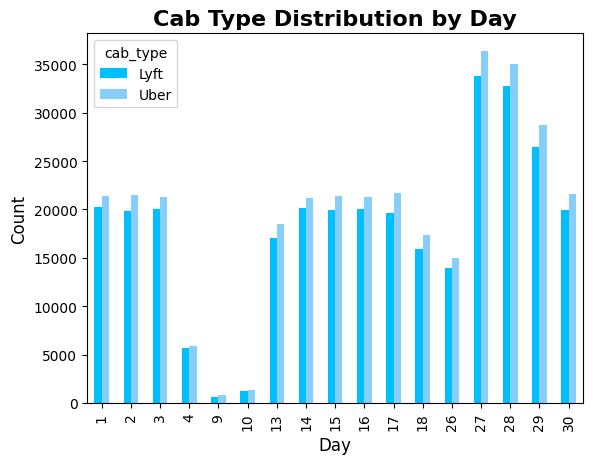

In [75]:
# Group the data by day and cab_type
grouped_data = df_clear.groupby(['day', 'cab_type']).size().unstack()

# Set custom colors for the bar chart
colors = ['deepskyblue', 'lightskyblue']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar chart with custom colors
grouped_data.plot(kind='bar', color=colors)

# Set the title
plt.title('Cab Type Distribution by Day', fontsize=16, fontweight='bold')

# Set the x-axis and y-axis labels
plt.xlabel('Day', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

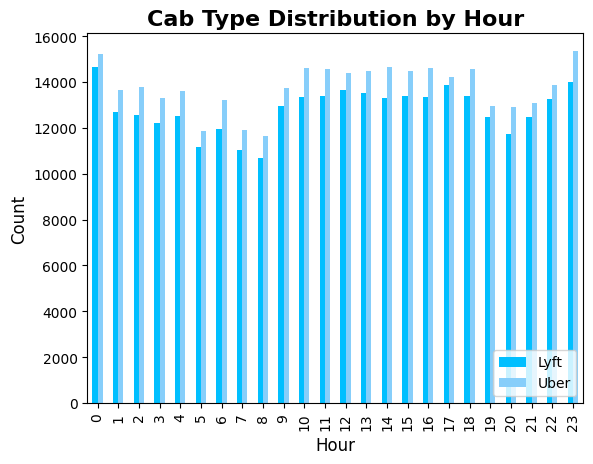

In [93]:
# Group the data by hour and cab_type
grouped_data = df_clear.groupby(['hour', 'cab_type']).size().unstack()

# Set custom colors for the bar chart
colors = ['deepskyblue', 'lightskyblue']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar chart with custom colors
grouped_data.plot(kind='bar', color=colors)

# Set the title
plt.title('Cab Type Distribution by Hour', fontsize=16, fontweight='bold')

# Set the x-axis and y-axis labels
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Move the legend to the bottom right
plt.legend(loc='lower right')

# Show the plot
plt.show()


Because there is only 2 month in the dataset, lets see the the pie chart.

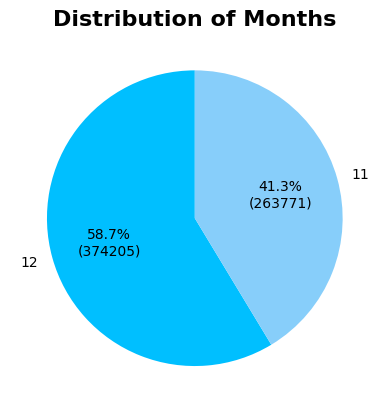

In [77]:
month_counts = df_clear['month'].value_counts()

labels = month_counts.index
sizes = month_counts.values

# Set custom colors for the pie chart (in this case, blue)
colors = ['deepskyblue', 'lightskyblue']

# Plot the pie chart with customizations
plt.pie(sizes, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sizes.sum())})", startangle=90, colors=colors)

# Add a title
plt.title('Distribution of Months', fontsize=16, fontweight='bold')

# Display the chart
plt.show()

In [86]:
def plot_bar(groupby_column):
    df1 = df.groupby(groupby_column).size().reset_index(name="counts")
    df1 = df1.sort_values(by="counts", ascending=False)

    print("Count by", groupby_column)
    print(df1)

    fig1 = px.bar(
        data_frame=df1,
        x=groupby_column,
        y="counts",
        color=groupby_column,
        barmode="group",
        template="plotly_white",
        labels={"counts": "Count"},
        title="<b>Bar Plot by " + groupby_column + "</b>",
    )

    fig1.update_layout(
        xaxis_title=groupby_column,
        legend_title=groupby_column,
        showlegend=True,
        plot_bgcolor="white",
        title=dict(text="<b>Bar Plot by " + groupby_column + "</b>", x=0.5),
    )

    fig1.show()


In [87]:
plot_bar('name')

Count by name
            name  counts
1      Black SUV   55096
11        UberXL   55096
12           WAV   55096
0          Black   55095
8           Taxi   55095
10         UberX   55094
9       UberPool   55091
2            Lux   51235
3      Lux Black   51235
4   Lux Black XL   51235
5           Lyft   51235
6        Lyft XL   51235
7         Shared   51233


In [88]:
plot_bar('day')

Count by day
    day  counts
13   27   76121
14   28   73691
15   29   59974
0     1   45240
16   30   45084
7    14   44928
1     2   44928
9    16   44928
10   17   44928
2     3   44928
8    15   44928
6    13   38531
11   18   36192
12   26   31587
3     4   12636
5    10    2773
4     9    1674


In [89]:
plot_bar('hour')

Count by hour
    hour  counts
0      0   32413
23    23   31931
13    13   30384
10    10   30384
18    18   30384
17    17   30384
16    16   30384
14    14   30384
11    11   30384
12    12   30384
15    15   30383
22    22   29436
9      9   28971
1      1   28548
2      2   28548
4      4   28330
3      3   27815
21    21   27732
19    19   27555
6      6   27336
20    20   26782
5      5   25008
7      7   24936
8      8   24275


In [90]:
plot_bar('source')

Count by source
                     source  counts
4        Financial District   58857
10         Theatre District   57813
0                  Back Bay   57792
2         Boston University   57764
6                 North End   57763
3                    Fenway   57757
8   Northeastern University   57756
9             South Station   57750
5          Haymarket Square   57736
11                 West End   57562
1               Beacon Hill   57403
7             North Station   57118


In [91]:
plot_bar('destination')

Count by destination
                destination  counts
4        Financial District   58851
10         Theatre District   57798
0                  Back Bay   57780
2         Boston University   57764
5          Haymarket Square   57764
3                    Fenway   57757
6                 North End   57756
8   Northeastern University   57755
9             South Station   57749
11                 West End   57575
1               Beacon Hill   57403
7             North Station   57119


In [92]:
# Get the list of column names in the dataset
columns = df_clear.columns.tolist()

# Initialize an empty list to store the categorical columns
category_cols = []

# Iterate over each column
for column in columns:
    # Check if the column contains categorical values
    if df[column].dtype == 'object':
        category_cols.append(column)

# Print the categorical columns
print("Categorical Columns:")
print(category_cols)

Categorical Columns:
['source', 'destination', 'cab_type', 'name', 'short_summary', 'long_summary', 'icon']


In [30]:
for column in category_cols:
    # Get the unique values in the column
    unique_values = df[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print(unique_values)
    print()

Column: source
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

Column: destination
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

Column: cab_type
['Lyft' 'Uber']

Column: name
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']

Column: short_summary
[' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']

Column: long_summary
[' Rain throughout the day. '
 ' Rain until morning, starting again in the evening. '
 ' Light rain in the morning. ' ' Partly cloudy throughout the day. '
 ' Mostly cloudy throughout the day. '
 ' Light rain in the morning

In [31]:
df_clear = df_clear.drop(['datetime'], axis=1)

In [32]:
# Create a new DataFrame to store the encoded values
df_cat_encode = df_clear.copy()

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column
for column in category_cols:
    # Encode the values in the column
    df_cat_encode[column] = label_encoder.fit_transform(df_clear[column])

# Print the encoded DataFrame
df_cat_encode

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary,long_summary,icon
0,9,16,12,5,7,0,7,5.0,0.44,1.0,42.2148,-71.0330,4,9,5
1,2,27,11,5,7,0,2,11.0,0.44,1.0,42.2148,-71.0330,8,10,6
2,1,28,11,5,7,0,5,7.0,0.44,1.0,42.2148,-71.0330,0,2,1
3,4,30,11,5,7,0,4,26.0,0.44,1.0,42.2148,-71.0330,0,6,1
4,3,29,11,5,7,0,6,9.0,0.44,1.0,42.2148,-71.0330,6,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,11,6,1,11,9.5,1.00,1.0,42.3519,-71.0643,6,1,5
693066,23,1,12,11,6,1,10,13.0,1.00,1.0,42.3519,-71.0643,6,1,5
693067,23,1,12,11,6,1,9,9.5,1.00,1.0,42.3519,-71.0643,6,1,5
693069,23,1,12,11,6,1,1,27.0,1.00,1.0,42.3519,-71.0643,6,1,5


In [33]:
# Make the price column to the left
# Get the column names
columns = df_cat_encode.columns

# Move 'price' column to the last position
columns = columns.drop('price').tolist()
columns.append('price')

# Reorder the DataFrame columns
df_cat_encode = df_cat_encode[columns]


In [34]:
df_cat_encode.sample(5)

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,short_summary,long_summary,icon,price
439121,14,28,11,2,1,1,1,2.79,1.0,42.3661,-71.0631,6,4,4,32.5
300519,18,27,11,11,3,0,6,2.94,1.0,42.3398,-71.0892,5,2,2,16.5
525722,9,27,11,1,9,1,1,1.40,1.0,42.3503,-71.0810,3,2,6,33.0
300502,16,14,12,4,5,0,6,1.25,1.0,42.3661,-71.0631,0,6,0,11.0
546620,14,2,12,0,9,1,10,1.68,1.0,42.3588,-71.0707,3,3,6,14.0


Lets see the correlation by using heatmap.

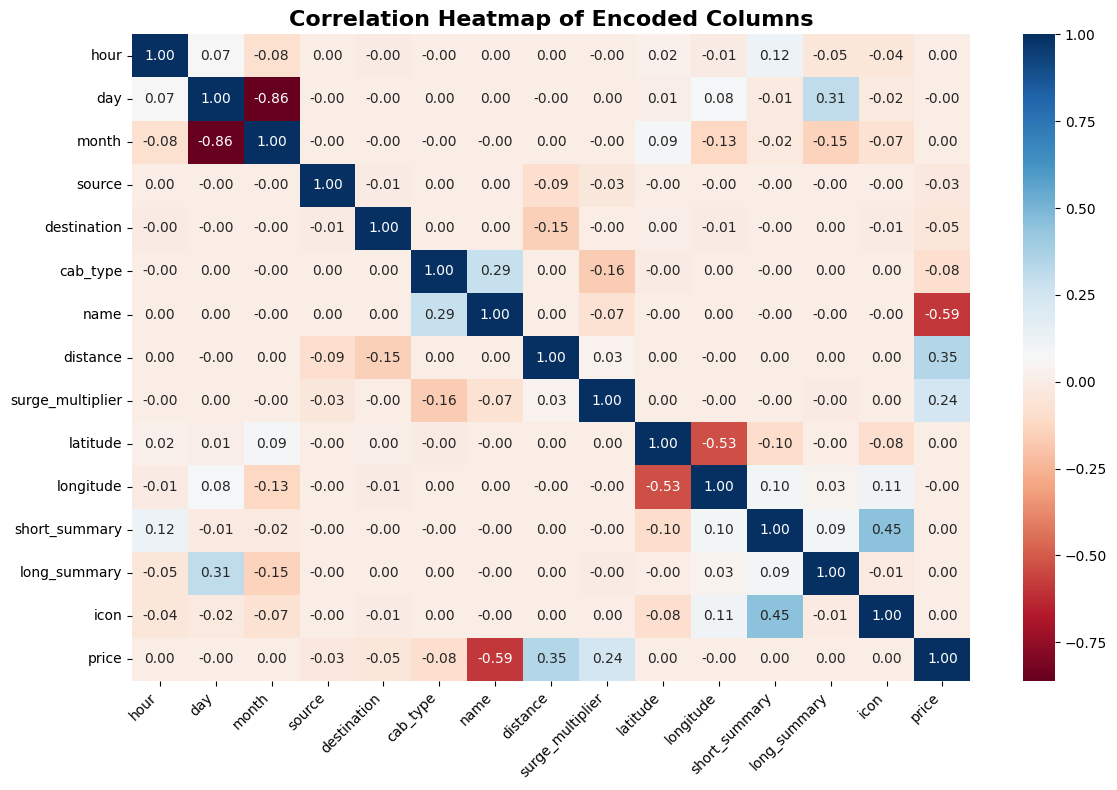

In [77]:
plt.figure(figsize=(12, 8))
heatmap_encode = sns.heatmap(df_cat_encode.corr(), annot=True, fmt=".2f", cmap='RdBu', annot_kws={"fontsize": 10})
heatmap_encode.set_title('Correlation Heatmap of Encoded Columns', fontsize=16, fontweight='bold')
heatmap_encode.set_xticklabels(heatmap_encode.get_xticklabels(), rotation=45, ha='right', fontsize=10)
heatmap_encode.set_yticklabels(heatmap_encode.get_yticklabels(), rotation=0, ha='right', fontsize=10)
cbar_encode = heatmap_encode.collections[0].colorbar
cbar_encode.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()


Suprisingly the cab_type(uber or lyft) doesn't give any good correlation to the price. It means it doesn't really matter using uber or lyft. Now we will make the new dataframe.

In [36]:
df_clear = df_clear.drop(['hour','day','month','source', 'destination', 'cab_type', 'latitude', 'longitude', 'short_summary', 'long_summary', 'icon'],axis=1)
df_clear.sample(5)

,name,price,distance,surge_multiplier
423327,Lyft,11.0,3.50,1.0
179629,UberPool,9.0,3.09,1.0
255970,UberX,13.0,4.72,1.0
10619,Lyft,7.0,1.74,1.0
157232,Lyft,9.0,1.39,1.0


### Detect and  Remove Outliers

In [37]:
def remove_outliers_iqr(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]
    dataframe = dataframe.drop(outliers.index)
    
    return dataframe


In [38]:
df_clear_cleaned = remove_outliers_iqr(df_clear, 'price')


In [39]:
# Print the dimensions of df_clear before removing outliers
print("Dimensions of df_clear before removing outliers: {}".format(df_clear.shape))

# Print the dimensions of df_clear_cleaned after removing outliers
print("Dimensions of df_clear_cleaned after removing outliers: {}".format(df_clear_cleaned.shape))

Dimensions of df_clear before removing outliers: (637976, 4)
Dimensions of df_clear_cleaned after removing outliers: (632387, 4)


In [40]:
df_clear_cleaned.sample(5)

,name,price,distance,surge_multiplier
17414,UberPool,6.5,1.89,1.0
439573,Shared,7.0,3.20,1.0
377191,Lyft,7.0,0.64,1.0
44608,Black SUV,26.0,1.90,1.0
422753,Lux Black,16.5,1.01,1.0


# Make the Regression Model

### Make the One Hot Encoder

In [41]:
def one_hot_encoder(data, feature, keep_first=True):
    one_hot_cols = pd.get_dummies(data[feature], drop_first=not keep_first)
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col: f'{feature}_{col}'}, axis=1, inplace=True)
    
    new_data = pd.concat([data, one_hot_cols], axis=1)
    new_data.drop(feature, axis=1, inplace=True)
    
    new_data = new_data.astype(int)  # Convert True/False to 1/0
    
    return new_data


In [42]:
df_clear_encoded=df_clear_cleaned.copy()
for col in df_clear_encoded.select_dtypes(include='O').columns:
    df_clear_encoded=one_hot_encoder(df_clear_encoded,col)
    
df_clear_encoded.head(5)

,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,11,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,7,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,26,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0


### Splitting the train and test dataframe

In [43]:
from sklearn.model_selection import train_test_split
x = df_clear_encoded.drop(columns=['price'],axis=1).values
y = df_clear_encoded['price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Modeling

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", mse_linear)
print("Mean Absolute Error (MAE):", mae_linear)
print("R-squared (R^2):", r2_linear)

Linear Regression Metrics:
Mean Squared Error (MSE): 6.583272184556634
Mean Absolute Error (MAE): 1.8856269267921941
R-squared (R^2): 0.9142397454278893


In [46]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R^2):", r2_rf)


Random Forest Regression Metrics:
Mean Squared Error (MSE): 4.59232954504886
Mean Absolute Error (MAE): 1.4470615089363326
R-squared (R^2): 0.9401757454619144


### Using GridSearchCV to find the best model

In [82]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
import pandas as pd

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.5, 1.0],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 75, 100],
                'max_depth': [None, 5, 10],
                'min_samples_split': [2, 5, 10]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs = RandomizedSearchCV(config['model'], config['params'], cv=cv, n_iter=10, random_state=0, n_jobs=-1, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

import warnings
warnings.filterwarnings('ignore')


In [83]:

df_score = find_best_model_using_gridsearchcv(x, y)
df_score

,model,best_score,best_params
0,linear_regression,0.913027,{'fit_intercept': True}
1,lasso,0.571324,"{'selection': 'random', 'alpha': 0.5}"
2,decision_tree,0.938824,"{'splitter': 'random', 'criterion': 'friedman_..."
3,random_forest,0.938818,"{'n_estimators': 100, 'min_samples_split': 2, ..."


Its given that decission tree give the best score even though random forest still do the best but slightly lower.

In [87]:

# Set display options for the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Display the full DataFrame

df_score

,model,best_score,best_params
0,linear_regression,0.913027,{'fit_intercept': True}
1,lasso,0.571324,"{'selection': 'random', 'alpha': 0.5}"
2,decision_tree,0.938824,"{'splitter': 'random', 'criterion': 'friedman_mse'}"
3,random_forest,0.938818,"{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}"
